In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [3]:
cd IIMA/

/content/drive/My Drive/IIMA


In [0]:
import pandas as pd

In [5]:
ls

250_Companies2.csv              latest_Model_2june.pkl  reviewers_rating_df.csv
250_Companies2.csv_chunk0.hdf5  latestreview.csv        Reviews/
combine_summary.csv             LightGBM.pkl            Reviews.csv
df5.csv                         loss_han.png            Reviews.ipynb
glove.6B.50d.txt                model_han_.hdf5         rev_test_pred_RF_df.csv
Harvard_Modified.csv            model_review.pkl
Indeed_Project.ipynb            Pickle_Model.pkl


In [0]:
df=pd.read_csv('latestreview.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,review,helpful%,helpfulness_range
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog FoodI have bought several of ...,1.0,5.0
1,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it allThis is a confection that...",1.0,5.0
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough MedicineIf you are looking for the secre...,1.0,5.0
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay BarleyRight now I'm mostly just sprouting ...,1.0,5.0
4,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the WorldI don't know if...,1.0,5.0


In [0]:
df=pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [0]:
df['review']=df['Summary']+df['Text']
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog FoodI have bought several of ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as AdvertisedProduct arrived labeled as Ju...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"""Delight"" says it allThis is a confection that..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough MedicineIf you are looking for the secre...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffyGreat taffy at a great price. Ther...


In [0]:
df.drop(labels=['Summary','Text'],axis=1,inplace=True)

In [0]:
df.dtypes

Id                          int64
ProductId                  object
UserId                     object
ProfileName                object
HelpfulnessNumerator        int64
HelpfulnessDenominator      int64
Score                       int64
Time                        int64
review                     object
helpful%                  float64
helpfulness_range         float64
dtype: object

In [0]:
df.shape

(262477, 11)

In [0]:
df.dropna(inplace=True)
df.shape

(262475, 11)

In [0]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
review                    0
helpful%                  0
helpfulness_range         2
dtype: int64

In [0]:
import numpy as np
import pandas as pd
import datetime
import calendar
import string
from scipy import sparse
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import neighbors
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
    
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df.shape

(262475, 11)

In [0]:
df.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,review,helpful%,helpfulness_range
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog FoodI have bought several of ...,1.0,5.0
1,1,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it allThis is a confection that...",1.0,5.0
2,2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough MedicineIf you are looking for the secre...,1.0,5.0
3,3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay BarleyRight now I'm mostly just sprouting ...,1.0,5.0
4,4,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the WorldI don't know if...,1.0,5.0


In [0]:
df = df[~pd.isnull(df['review'])] # Deleting all the lines that has no reviewText
df.drop_duplicates(subset=['ProductId','UserId','Time'], inplace=True)
df.reset_index(inplace=True)
df.shape

(262475, 12)

In [0]:
df.drop(labels=['index'],axis=1,inplace=True)

In [0]:
df['helpful%'] = np.where(df['HelpfulnessDenominator'] > 0,df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)

In [0]:
# Now to segment the values into bins
df['helpfulness_range'] = pd.cut(x=df['helpful%'], bins=[-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0],
                                         labels=['empty', '1', '2', '3', '4', '5'], include_lowest=True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,review,helpful%,helpfulness_range
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog FoodI have bought several of ...,1.0,5
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as AdvertisedProduct arrived labeled as Ju...,-1.0,empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it allThis is a confection that...",1.0,5
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough MedicineIf you are looking for the secre...,1.0,5
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffyGreat taffy at a great price. Ther...,-1.0,empty


In [0]:
df2 = df.copy()

In [0]:
df.to_csv('latestreview.csv',index=False)

In [0]:
df.drop(df[df['helpfulness_range'] == 'empty'].index, inplace=True)
df['helpfulness_range'] = df['helpfulness_range'].map({'1':1,'2':2,'3':3,'4':4,'5':5,'empty':1})
df.reset_index(drop=True, inplace=True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,review,helpful%,helpfulness_range
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog FoodI have bought several of ...,1.0,5.0
1,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it allThis is a confection that...",1.0,5.0
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough MedicineIf you are looking for the secre...,1.0,5.0
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay BarleyRight now I'm mostly just sprouting ...,1.0,5.0
4,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the WorldI don't know if...,1.0,5.0


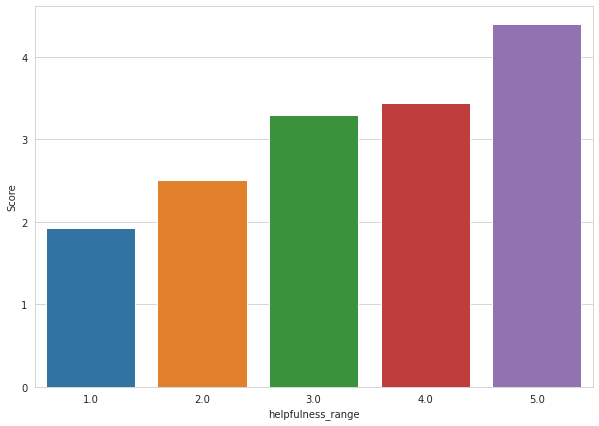

In [0]:
#EDA
df3 = pd.DataFrame(df.groupby('helpfulness_range')['Score'].mean().reset_index())
fig = plt.figure(figsize=(10,7))
sns.barplot(x=df3['helpfulness_range'], y=df3['Score']) # there is a connection between high overall score and review score

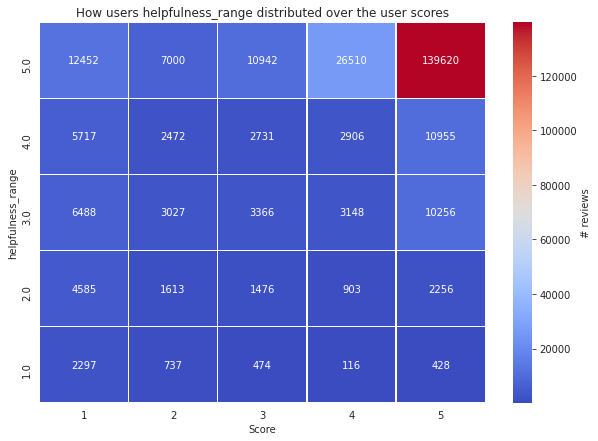

In [0]:
df3 = df.groupby(['Score', 'helpfulness_range']).agg(UserId=('UserId','count'))
df3 = df3.unstack()
df3.columns = df3.columns.get_level_values(1)
fig = plt.figure(figsize=(10,7))
sns.heatmap(df3[df3.columns[::-1]].T, cmap = 'coolwarm', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.title('How users helpfulness_range distributed over the user scores')
plt.show()

In [0]:
# RRP based on Review Text Content
# Feature Engineering

df['helpfulness_range'].value_counts()

5.0    196524
3.0     26285
4.0     24781
2.0     10833
1.0      4052
Name: helpfulness_range, dtype: int64

In [0]:
df['Score'].value_counts()

5    163515
4     33583
1     31539
3     18989
2     14849
Name: Score, dtype: int64

In [0]:
import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import lightgbm as lgbm
from lightgbm import LGBMClassifier, LGBMRegressor

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df['review'], df['Score'], random_state = 0, test_size=0.3, shuffle=True)

In [0]:
tfidf_vec = TfidfVectorizer(dtype=np.float32, sublinear_tf=True, use_idf=True, smooth_idf=True)
X_data_tfidf = tfidf_vec.fit_transform(df['review'])
X_train_tfidf = tfidf_vec.transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

In [0]:
clf_LGBM = lgbm.LGBMClassifier(objective='multiclass', verbose=-1, learning_rate=0.5, max_depth=20, num_leaves=50, n_estimators=120, max_bin=2000,)
clf_LGBM.fit(X_train_tfidf, Y_train, verbose=-1)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_bin=2000,
               max_depth=20, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=120, n_jobs=-1, num_leaves=50,
               objective='multiclass', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [0]:
predicted_LGBM = clf_LGBM.predict(X_test_tfidf)
print(metrics.classification_report(Y_test, predicted_LGBM))

              precision    recall  f1-score   support

           1       0.78      0.79      0.78      9585
           2       0.64      0.46      0.54      4455
           3       0.66      0.50      0.57      5660
           4       0.66      0.43      0.52     10083
           5       0.85      0.96      0.90     48960

    accuracy                           0.81     78743
   macro avg       0.72      0.63      0.66     78743
weighted avg       0.79      0.81      0.79     78743



In [0]:
import pickle
Pkl_Filename = "LightGBM.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(predicted_LGBM, file)


In [0]:
#--main code--#  


count_vect = CountVectorizer(ngram_range=(1,2), stop_words=stopwords1)
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer(use_idf=True, smooth_idf=True, norm='l2', sublinear_tf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

lgbm_train = lgbm.Dataset(X_train_tfidf, Y_train)
lgbm_eval = lgbm.Dataset(count_vect.transform(X_test), Y_test, reference=lgbm_train)

params = {
    'boosting_type':'gbdt',
    'objective':'multiclass',
    'learning_rate': 0.02,
    'num_class': 3,
    'early_stopping': 100,
    'num_iteration': 2000, 
    'num_leaves': 31,
    'is_enable_sparse': 'true',
    'tree_learner': 'data',
    'max_depth': 4, 
    'n_estimators': 50  
    }

clf_gbm = lgbm.train(params, valid_sets=lgbm_eval)
predicted_LGBM = clf_gbm.predict(count_vect.transform(X_test))

print(accuracy_score(Y_test, predicted_LGBM))

In [0]:
tfidf_vec = TfidfVectorizer(dtype=np.float32, sublinear_tf=True, use_idf=True, smooth_idf=True)
X_data_tfidf = tfidf_vec.fit_transform(df['contents'])
X_train_tfidf = tfidf_vec.transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

clf_LGBM = lgbm.LGBMClassifier(objective='multiclass', verbose=-1, learning_rate=0.5, max_depth=20, num_leaves=50, n_estimators=120, max_bin=2000,)
clf_LGBM.fit(X_train_tfidf, Y_train, verbose=-1)
predicted_LGBM = clf_LGBM.predict(X_test_tfidf)

In [0]:
# Notice that the data is really skewed, that means consider resampling!

# Now to define our text processor

def text_process(review):
    nopunc = [i for i in review if i not in string.punctuation]
    nopunc_text = ''.join(nopunc)
    return [i for i in nopunc_text.split() if i.lower() not in stopwords.words('english')]

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# RandomForest
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_process)),
    ('classifier', RandomForestClassifier())])
X = df['review']
y = df['helpfulness_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('Tf-Idf',
                 TfidfVectorizer(analyzer=<function text_process at 0x7f899a4e7950>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 s...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                             

In [0]:
pip_pred4 = pipeline.predict(X_test)
print(metrics.classification_report(y_test, pip_pred4))

              precision    recall  f1-score   support

         1.0       0.99      0.38      0.55      2015
         2.0       0.98      0.38      0.54      5397
         3.0       0.98      0.36      0.52     13091
         4.0       0.97      0.32      0.48     12337
         5.0       0.82      1.00      0.90     98398

    accuracy                           0.84    131238
   macro avg       0.95      0.49      0.60    131238
weighted avg       0.86      0.84      0.80    131238



In [0]:
import pickle
Pkl_Filename = "latest_Model_2june.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(pip_pred4, file)



In [0]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)

Pickled_Model


# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
# score = Pickled_Model.score(x_test, y_test)  
# # Print the Score
# print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_Model.predict(x_test)  

Ypredict

In [0]:
#Score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, df['review'], df['helpfulness_range'], cv=5)
print(scores.mean())

In [0]:
#Export
rev_test_pred_RF_df = pd.DataFrame(data={'review_test': X_test,
                                         'prediction': pip_pred4})
rev_test_pred_RF_df.to_csv('rev_test_pred_RF_df.csv')

In [0]:
#RRP based on User Similarity


In [0]:
reviewers_rating_df = df[['UserId', 'ProductId', 'Score', 'helpfulness_range']].copy()
reviewers_rating_df['Score'] = reviewers_rating_df['Score'].apply(int)

In [0]:
reviewers_rating_df

,UserId,ProductId,Score,helpfulness_range
0,A3SGXH7AUHU8GW,B001E4KFG0,5,5.0
1,ABXLMWJIXXAIN,B000LQOCH0,4,5.0
2,A395BORC6FGVXV,B000UA0QIQ,2,5.0
3,A1MZYO9TZK0BBI,B000E7L2R4,5,5.0
4,A3HDKO7OW0QNK4,B0001PB9FE,5,5.0
...,...,...,...,...
262472,A2TO5R8QLIITEF,B005ZC0RRO,5,5.0
262473,A2SD7TY3IOX69B,B001EO7N10,5,5.0
262474,A2E5C8TTAED4CQ,B001EO7N10,5,5.0
262475,A121AA1GQV751Z,B004I613EE,5,5.0


In [0]:
# we need to convert the string names of reviewerID and asin to unique integers before we can generate a matrix

temp_df = pd.DataFrame(np.unique(reviewers_rating_df['UserId']), columns=['unique_ID'])
temp_df['unique_ProductId'] = pd.Series(np.unique(reviewers_rating_df['ProductId']))
temp_df.reset_index(drop=True,inplace=True)


In [0]:
temp_df['unique_ID_int'] = range(len(temp_df),len(temp_df)*2)
temp_df['unique_ProductId_int'] = range(0,len(temp_df))

In [0]:
reviewers_rating_df = pd.merge(reviewers_rating_df, temp_df.drop(['unique_ProductId', 'unique_ProductId_int'], axis=1),
                               left_on='UserId', right_on='unique_ID')

In [0]:
reviewers_rating_df

,UserId,ProductId,Score,helpfulness_range,unique_ID,unique_ID_int
0,A3SGXH7AUHU8GW,B001E4KFG0,5,5.0,A3SGXH7AUHU8GW,236539
1,ABXLMWJIXXAIN,B000LQOCH0,4,5.0,ABXLMWJIXXAIN,248105
2,A395BORC6FGVXV,B000UA0QIQ,2,5.0,A395BORC6FGVXV,217355
3,A395BORC6FGVXV,B002Y7526Y,2,5.0,A395BORC6FGVXV,217355
4,A395BORC6FGVXV,B000U9WZ54,2,5.0,A395BORC6FGVXV,217355
...,...,...,...,...,...,...
262472,A3M89SF0SSOGBK,B000NY4SAG,5,5.0,A3M89SF0SSOGBK,230318
262473,A2TO5R8QLIITEF,B005ZC0RRO,5,5.0,A2TO5R8QLIITEF,201880
262474,A2SD7TY3IOX69B,B001EO7N10,5,5.0,A2SD7TY3IOX69B,200594
262475,A121AA1GQV751Z,B004I613EE,5,5.0,A121AA1GQV751Z,138494


In [0]:
reviewers_rating_df = pd.merge(reviewers_rating_df, temp_df.drop(['unique_ID', 'unique_ID_int'], axis=1),
                               left_on='ProductId', right_on='unique_ProductId')

In [0]:
reviewers_rating_df

,UserId,ProductId,Score,helpfulness_range,unique_ID,unique_ID_int,unique_ProductId,unique_ProductId_int
0,A3SGXH7AUHU8GW,B001E4KFG0,5,5.0,A3SGXH7AUHU8GW,236539,B001E4KFG0,20312
1,ABXLMWJIXXAIN,B000LQOCH0,4,5.0,ABXLMWJIXXAIN,248105,B000LQOCH0,11542
2,A395BORC6FGVXV,B000UA0QIQ,2,5.0,A395BORC6FGVXV,217355,B000UA0QIQ,14667
3,A395BORC6FGVXV,B002Y7526Y,2,5.0,A395BORC6FGVXV,217355,B002Y7526Y,31328
4,A395BORC6FGVXV,B000U9WZ54,2,5.0,A395BORC6FGVXV,217355,B000U9WZ54,14651
...,...,...,...,...,...,...,...,...
262472,A1RKKPSXF9QIZF,B000NY4SAG,5,5.0,A1RKKPSXF9QIZF,163803,B000NY4SAG,12960
262473,A3M89SF0SSOGBK,B000NY4SAG,5,5.0,A3M89SF0SSOGBK,230318,B000NY4SAG,12960
262474,A2TO5R8QLIITEF,B005ZC0RRO,5,5.0,A2TO5R8QLIITEF,201880,B005ZC0RRO,44256
262475,A121AA1GQV751Z,B004I613EE,5,5.0,A121AA1GQV751Z,138494,B004I613EE,39415


In [0]:
reviewers_rating_df['Score_rating'] = reviewers_rating_df['Score']
id_ProductId_helpfulness_df = reviewers_rating_df[['UserId', 'unique_ID_int', 'helpfulness_range']].copy()
reviewers_rating_df.drop(['ProductId', 'unique_ProductId', 'UserId', 'unique_ID', 'Score', 'helpfulness_range'], axis=1, inplace=True)

In [0]:
reviewers_rating_df.drop_duplicates(subset=['unique_ID_int','unique_ProductId_int'],inplace=True)

In [0]:
reviewers_rating_df

,unique_ID_int,unique_ProductId_int,Score_rating
0,236539,20312,5
1,248105,11542,4
2,217355,14667,2
3,217355,31328,2
4,217355,14651,2
...,...,...,...
262472,163803,12960,5
262473,230318,12960,5
262474,201880,44256,5
262475,138494,39415,5


In [0]:
reviewers_rating_df.to_csv('reviewers_rating_df.csv',index=False)

In [0]:
reviewers_rating_df=pd.read_csv('reviewers_rating_df.csv')

In [0]:
#Feature Engineering
matrix = reviewers_rating_df.pivot(index='unique_ID_int', columns='unique_ProductId_int', values='Score_rating')

In [0]:
matrix = matrix.fillna(0)

In [0]:
user_item_matrix = sparse.csr_matrix(matrix.values)

In [0]:
df.drop(labels=['ProfileName','Time','Summary','Text'],axis=1,inplace=True)

In [0]:
import pandas as pd
import numpy as np

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier

In [0]:
df.shape

(568427, 7)

In [0]:
set(df['Score'])

{1, 2, 3, 4, 5}

In [0]:
from collections import Counter
Counter(df['Score'])

Counter({1: 52268, 2: 29744, 3: 42638, 4: 80655, 5: 363122})

In [0]:
#pre-processing
import re 
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub(r"\n", "", string)    
    string = re.sub(r"\r", "", string) 
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()

In [0]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'review'],
      dtype='object')

In [0]:
#train test split
from sklearn.model_selection import train_test_split
X = []
for i in range(df['review'].shape[0]):
    X.append(clean_str(df.iloc[i][6]))
y = np.array(df["Score"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [0]:
#feature engineering and model selection
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [0]:
#pipeline of feature engineering and model
model = Pipeline([('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced")))])

In [0]:
#paramater selection
from sklearn.model_selection import GridSearchCV
parameters = {'vectorizer__ngram_range': [(1, 1), (1, 2),(2,2)],
               'tfidf__use_idf': (True, False)}

In [0]:
gs_clf_svm = GridSearchCV(model, parameters, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X, y)
print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)

In [0]:
#preparing the final pipeline using the selected parameters
model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced")))])

In [0]:
#fit model with training data
model.fit(X_train, y_train)

In [0]:
#evaluation on test data
pred = model.predict(X_test)

In [0]:
model.classes_

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(pred, y_test)

In [0]:
accuracy_score(y_test, pred)

In [0]:
#save the model
from sklearn.externals import joblib
joblib.dump(model, 'model_question_topic.pkl', compress=1)

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')


import pickle
from collections import defaultdict
import re
from bs4 import BeautifulSoup
import sys
import os
os.environ['KERAS_BACKEND']='theano'
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['review'] = df['review'].apply(clean_text)

In [0]:
df.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,good quality dog foodi bought several vitality...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,advertisedproduct arrived labeled jumbo salted...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,delight says allthis confection around centuri...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,cough medicineif looking secret ingredient rob...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,great taffygreat taffy great price wide assort...


In [0]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
MAX_SENT_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 50

MAX_SENTS = 200
MAX_NB_WORDS = 20000
VALIDATION_SPLIT = 0.4

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
n_words=len(word_index)


Found 323350 unique tokens.


In [0]:
import nltk
from nltk import tokenize
nltk.download('punkt')
  
max_features = 20000 #how many unique words to use (i.e num rows in embedding vector)
maxlen = 1000  # max number of words in a tweet to use

list_sentences = df['review'].values

# Tokenize
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
EMBEDDING_DIM = 50

In [0]:
#TEst2
#test
embeddings_index = {}
f = open('glove.6B.50d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors.' % len(embeddings_index))




embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SENT_LENGTH,
                            trainable=True)

Total 400000 word vectors.


In [0]:
# Option2  (worked)
x = tokenizer.texts_to_sequences(df['review'].values)
x = pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x.shape)
y = pd.get_dummies(df['Score']).values
print('Shape of label tensor:', y.shape)
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=2, n_repeats=5, random_state=None) 

for train_index, test_index in kf.split(x):
    print("Train:", train_index, "Validation:",test_index)
    x_train, x_test = x[train_index], x[test_index] 
    y_train, y_test = y[train_index], y[test_index]

Shape of data tensor: (568427, 250)
Shape of label tensor: (568427, 5)
Train: [     1      4      5 ... 568422 568423 568425] Validation: [     0      2      3 ... 568416 568424 568426]
Train: [     0      2      3 ... 568416 568424 568426] Validation: [     1      4      5 ... 568422 568423 568425]
Train: [     0      2      7 ... 568422 568423 568424] Validation: [     1      3      4 ... 568420 568425 568426]
Train: [     1      3      4 ... 568420 568425 568426] Validation: [     0      2      7 ... 568422 568423 568424]
Train: [     1      2      6 ... 568414 568417 568426] Validation: [     0      3      4 ... 568423 568424 568425]
Train: [     0      3      4 ... 568423 568424 568425] Validation: [     1      2      6 ... 568414 568417 568426]
Train: [     5      8     10 ... 568424 568425 568426] Validation: [     0      1      2 ... 568417 568420 568422]
Train: [     0      1      2 ... 568417 568420 568422] Validation: [     5      8     10 ... 568424 568425 568426]
Train: [ 

In [0]:
#rnn
sequence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(LSTM(50))(embedded_sequences)
preds = Dense(5, activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

print("model fitting - Bidirectional LSTM")
model.summary()

model fitting - Bidirectional LSTM
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 250)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 250, 50)           16167550  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               40400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 16,208,455
Trainable params: 16,208,455
Non-trainable params: 0
_________________________________________________________________


In [0]:
cp=ModelCheckpoint('model_han_.hdf5',monitor='val_acc',verbose=2, save_best_only=True)
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=1000, callbacks=[cp] )  

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 284214 samples, validate on 284213 samples
Epoch 1/2
284214/284214 [==============================] - 1344s 5ms/step - loss: 0.9310 - acc: 0.6717 - val_loss: 0.7674 - val_acc: 0.7165

Epoch 00001: val_acc improved from -inf to 0.71647, saving model to model_han_.hdf5
Epoch 2/2
284214/284214 [==============================] - 1344s 5ms/step - loss: 0.7119 - acc: 0.7332 - val_loss: 0.6996 - val_acc: 0.7377

Epoch 00002: val_acc improved from 0.71647 to 0.73770, saving model to model_han_.hdf5


In [0]:
#save the model
from sklearn.externals import joblib
joblib.dump(model, 'model_review.pkl', compress=1)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



['model_review.pkl']

Text(0.5, 0, 'Epochs ')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Loss Curves: LSTM')

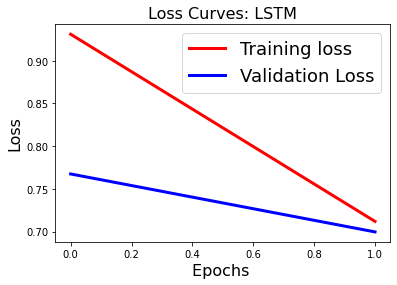

In [0]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves: LSTM',fontsize=16)
fig1.savefig('loss_han.png')
plt.show()

In [0]:
accr = model.evaluate(x_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

284213/284213 [==============================] - 378s 1ms/step
Test set
  Loss: 0.700
  Accuracy: 0.738


In [0]:
import pickle
Pkl_Filename = "Pickle_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [0]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)

Pickled_Model

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



In [0]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
# score = Pickled_Model.score(x_test, y_test)  
# # Print the Score
# print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_Model.predict(x_test)  

Ypredict

In [0]:
review_ = input()

I really liked the product. it was good, but not so good


In [0]:
review

'I really liked the product. it was good, but not so good'

In [0]:
model.predict([review])[0]

AttributeError: ignored

In [0]:
!pip install pycaret

     |████████████████████████████████| 194kB 3.4MB/s 
     |████████████████████████████████| 266kB 40.3MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 7.0MB 20.5MB/s 
     |████████████████████████████████| 1.2MB 40.5MB/s 
     |████████████████████████████████| 133kB 50.0MB/s 
     |████████████████████████████████| 1.6MB 35.0MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
     |████████████████████████████████| 63.9MB 119kB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 389kB 40.6MB/s 
     |████████████████████████████████| 3.1MB 38.7MB/s 
     |████████████████████████████████| 235kB 47.0MB/s 
     |████████████████████████████████| 604kB 41.2MB/s 
     |████████████████████████████████| 552kB 48.9MB/s 
     |████████████████████████████████| 2.1MB 35.3MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 6.2MB 32.1MB/s 

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from pycaret.nlp import *

In [0]:
%time su_1 = setup(data = df, target = 'review', custom_stopwords=stop_words, session_id=21)

Description,Value
session_id,21
# Documents,568427
Vocab Size,133772
Custom Stopwords,True


CPU times: user 52min 30s, sys: 11.3 s, total: 52min 41s
Wall time: 52min 46s


In [0]:
#Stage 2 : Embedding on the processed text data

In [0]:
%time m1 = create_model(model='lda', multi_core=True)

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:20:45
Status,. . . . . . . . . . . . . . . . . .,Fitting Topic Model


Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 103, in worker
    initializer(*initargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 103, in worker
    initializer(*initargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/gensim/models/ldamulticore.py", line 330, in work

KeyboardInterrupt: ignored

Process ForkPoolWorker-5:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 103, in worker
    initializer(*initargs)
  File "/usr/local/lib/python3.6/dist-packages/gensim/models/ldamulticore.py", line 330, in worker_e_step
    chunk_no, chunk, worker_lda = input_queue.get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
EOFError: Ran out of input
Process ForkPoolWorker-7:
Process ForkPoolWorker-3:
Process ForkPoolWorker-6:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py

In [0]:
%time lda_data = assign_model(m1)

In [0]:
lda_data.head()

In [0]:
evaluate_model(m1)

In [0]:
%time m2 = create_model(model='nmf', multi_core=True)

In [0]:
%time nmf_data = assign_model(m2)

In [0]:
lda_data.head()

In [0]:
lda_data.columns

In [0]:
lda_data.drop(['review', 'Dominant_Topic', 'Perc_Dominant_Topic'], axis=1, inplace = True)
lda_data.head()

In [0]:
#NEw model

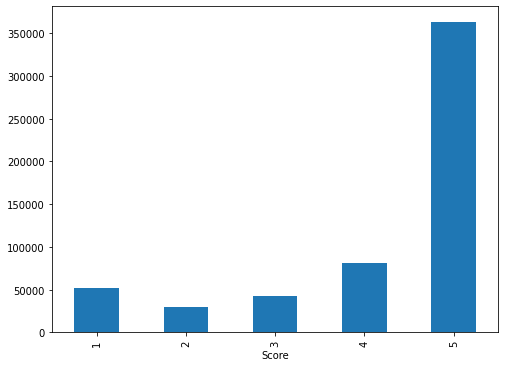

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Score').review.count().plot.bar(ylim=0)
plt.show()

In [0]:
#Text representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.review).toarray()
labels = df.Score
features.shape

In [0]:
#importing libraries
import numpy as np
from collections import Counter
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer,load_boston,load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
pd.options.display.max_columns = 999

In [0]:
#loading the dataset
X1=load_wine()
df_1=pd.DataFrame(X1.data,columns=X1.feature_names)
Y_1=X1.target

In [0]:
# Recommendation system kaggle

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
from wordcloud import WordCloud, STOPWORDS

In [0]:
#import data
df = pd.read_csv("Reviews.csv")

In [0]:
#Basic Information shape and columns
print(df.columns)
print(df.shape)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
(568454, 10)


In [0]:
# 1. Product based collaborative filtering

In [0]:
#compute the count and mean value as group by the products
count = df.groupby("ProductId", as_index=False).count()
mean = df.groupby("ProductId", as_index=False).mean()

#merge two dataset create df1
df1 = pd.merge(df, count, how='right', on=['ProductId'])

#rename column
df1["Count"] = df1["UserId_y"]
df1["Score"] = df1["Score_x"]
df1["Summary"] = df1["Summary_x"]

#Create New datafram with selected variables
df1 = df1[['ProductId','Summary','Score',"Count"]]

In [0]:
df1

,ProductId,Summary,Score,Count
0,B001E4KFG0,Good Quality Dog Food,5,1
1,B00813GRG4,Not as Advertised,1,1
2,B000LQOCH0,"""Delight"" says it all",4,1
3,B000UA0QIQ,Cough Medicine,2,1
4,B006K2ZZ7K,Great taffy,5,4
...,...,...,...,...
568449,B001EO7N10,Will not do without,5,6
568450,B003S1WTCU,disappointed,2,1
568451,B004I613EE,Perfect for our maltipoo,5,2
568452,B004I613EE,Favorite Training and reward treat,5,2


In [0]:
#choose only products have over 100 reviews
df1 = df1.sort_values(by=['Count'], ascending=False)
df2 = df1[df1.Count >= 50]

In [0]:
df2

,ProductId,Summary,Score,Count
563881,B007JFMH8M,yummy,5,913
563615,B007JFMH8M,Healthy and yummy too,5,913
563629,B007JFMH8M,Soft and chewy but a bit too sweet!,4,913
563628,B007JFMH8M,Pretty Good Cookie,4,913
563627,B007JFMH8M,Good Taste and Flavor But a Little on the Dry ...,3,913
...,...,...,...,...
49196,B0015UX574,Wine gums are habit forming,4,50
49197,B0015UX574,Danger: highly addictive,5,50
49198,B0015UX574,Nice,4,50
53985,B000EGZ2L2,Great !,5,50


In [0]:
#create new dataframe as combining all summary with same product Id
df4 = df.groupby("ProductId", as_index=False).mean()
combine_summary = df2.groupby("ProductId")["Summary"].apply(list)
combine_summary = pd.DataFrame(combine_summary)
combine_summary.to_csv("combine_summary.csv")

In [0]:
#create with certain columns
df3 = pd.read_csv("combine_summary.csv")
df3 = pd.merge(df3, df4, on="ProductId", how='inner')
df3 = df3[['ProductId','Summary','Score']]

In [0]:
df3['Score_']=0
df3['Score_']=df3.Score.round()

In [0]:
df3

,ProductId,Summary,Score,Score_
0,7310172001,"['The Only Treat My Dog Will Eat!', 'Great for...",4.751445,5.0
1,7310172101,"['very good', 'Dogs Love These!', 'Great for t...",4.751445,5.0
2,B00004CI84,"['Blueray: Great movie. Blue-Ray-Okay', 'Bee...",4.486772,4.0
3,B00004CXX9,['Great Movie...But NOT Given DELUXE Treatment...,4.405128,4.0
4,B00004RAMY,"['It worked!', 'Finally, a trap that works', '...",4.104651,4.0
...,...,...,...,...
1839,B009B87SAC,"['Only food my cats can agree on', 'vomiting c...",3.600000,4.0
1840,B009E7YC54,"['A wonderful product', 'I love PB2', 'LOVE', ...",4.642857,5.0
1841,B009GHI5Q4,"['Five stars and an Eight paw Salute', 'the on...",3.600000,4.0
1842,B009M2LUEW,"['Great substitute for side', 'Yum', 'Zevia Ro...",4.159420,4.0


In [0]:
df3['Summary']

0       ['The Only Treat My Dog Will Eat!', 'Great for...
1       ['very good', 'Dogs Love These!', 'Great for t...
2       ['Blueray:  Great movie.  Blue-Ray-Okay', 'Bee...
3       ['Great Movie...But NOT Given DELUXE Treatment...
4       ['It worked!', 'Finally, a trap that works', '...
                              ...                        
1839    ['Only food my cats can agree on', 'vomiting c...
1840    ['A wonderful product', 'I love PB2', 'LOVE', ...
1841    ['Five stars and an Eight paw Salute', 'the on...
1842    ['Great substitute for side', 'Yum', 'Zevia Ro...
1843    ['YUM!', 'Terrible! The cups were empty!', 'Au...
Name: Summary, Length: 1844, dtype: object

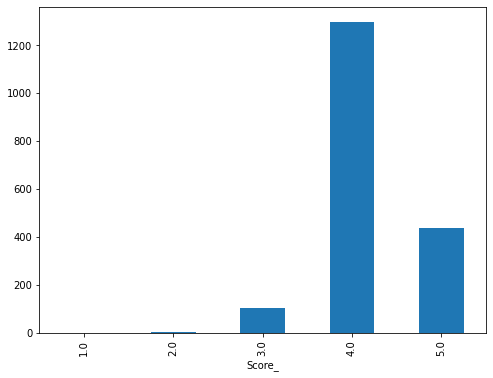

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df3.groupby('Score_').ProductId.count().plot.bar(ylim=0)
plt.show()

In [0]:
# 1.a Text Clean process - Summary column

In [0]:
#function for tokenizing summary
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
#reset index and drop duplicate rows
df3["Summary_Clean"] = df3["Summary"].apply(cleanup)
df3 = df3.drop_duplicates(['Score'], keep='last')
df3 = df3.reset_index()
from pandas import DataFrame 

docs = df3["Summary_Clean"] 
vect = CountVectorizer(max_features = 100, stop_words='english') 
X = vect.fit_transform(docs) 

df5 = DataFrame(X.A, columns=vect.get_feature_names())
df5 = df5.astype(int)
#save 
df5.to_csv("df5.csv")

In [0]:
df5

,alternative,amazing,amazon,awesome,baby,bad,bar,bars,best,better,bold,bread,breakfast,butter,buy,cat,cats,cereal,chips,chocolate,coconut,coffee,cookie,cookies,cup,cups,dark,deal,delicious,does,dog,dogs,don,drink,easy,energy,excellent,fantastic,favorite,flavor,...,nice,oil,ok,okay,organic,packaging,peanut,perfect,popcorn,pretty,price,product,quality,real,really,smooth,snack,strong,stuff,sugar,sweet,taste,tastes,tasting,tasty,tea,time,treat,treats,use,value,vanilla,ve,water,way,wonderful,work,works,yum,yummy
0,0,0,1,6,0,1,0,0,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,1,0,...,2,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,3,0,0,0,0,11,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0,0,3,0,0,8,0,0,1,0,0,0,0,0,0,0,0,2,0,0,5,0,0,2,0,4,0,8,31,0,0
2,0,0,0,0,0,1,0,0,1,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,1,0,0,0,...,0,0,2,2,0,0,0,2,0,0,0,7,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,7,17,0,0
3,0,0,1,6,0,1,0,0,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,...,2,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,2,1,0,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,0,...,4,0,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,2,0,0,1,0,0,0,0,12,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,0,3,18,0,3,2,0,0,0,0,0,0,2,0,0,0,0,2,2,0,0,0,0
852,7,20,2,11,0,2,0,1,7,3,0,2,1,30,3,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,2,0,0,0,4,4,1,2,...,1,0,0,3,0,1,32,4,0,3,0,22,0,5,1,0,0,0,11,4,2,7,6,1,3,0,0,0,0,2,2,0,0,0,0,3,1,0,5,8
853,0,0,0,0,0,1,0,0,4,0,0,0,0,0,2,29,10,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0
854,3,1,0,2,0,2,0,0,7,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,2,0,0,0,1,0,0,6,...,1,0,1,1,0,0,0,1,0,0,1,2,0,2,0,0,0,0,4,3,1,7,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
# First let's create a dataset called X
X = np.array(df5)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(df5)))
df5_train = X[:tsize]
df5_test = X[tsize:]
#len of train and test
lentrain = len(df5_train)
lentest = len(df5_test)

In [0]:
# 1.b KNN classifier to find similar products


In [0]:
# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(df5_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = nbrs.kneighbors(df5_train)

In [0]:
for i in range(lentest):
    a = nbrs.kneighbors([df5_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["ProductId"][lentrain + i] ," and this average Score is ",df3["Score"][lentrain + i])
    print ("The first similar product is ", df3["ProductId"][first_related_product] ," and this average Score is ",df3["Score"][first_related_product])
    print ("The second similar product is ", df3["ProductId"][second_related_product] ," and this average Score is ",df3["Score"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B007OXJK3Y  and this average Score is  3.5660377358490565
The first similar product is  B007OXJJQ2  and this average Score is  4.44
The second similar product is  B002QGK2V8  and this average Score is  3.4484848484848483
-----------------------------------------------------------
Based on product reviews, for  B007OXJKF2  and this average Score is  3.576923076923077
The first similar product is  B007OXJJQ2  and this average Score is  4.44
The second similar product is  B004I3Y4IE  and this average Score is  4.317073170731708
-----------------------------------------------------------
Based on product reviews, for  B007OXJL0G  and this average Score is  4.139344262295082
The first similar product is  B004IRGD3O  and this average Score is  4.1688311688311686
The second similar product is  B007OXJJQ2  and this average Score is  4.44
-----------------------------------------------------------
Based on product reviews, for  B007PA30ZU  and this average Score i

In [0]:
# 1.c Predicting Review Score

In [0]:
df5_train_target = df3["Score"][:lentrain]
df5_test_target = df3["Score"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(df5_train, df5_train_target)
knnpreds_test = knnclf.predict(df5_test)
print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))
print (accuracy_score(df5_test_target, knnpreds_test))

[3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 4 4 3 4 3 4
 4 4 3 4 4 3 4 3 4 4 4 4 4 3 3 4 4 4 4 3 4 4 3 4 4 3 4 3 4 4 4 4 4 4 4 4 4
 4 3 4 2 4 4 4 4 4 4 4 3]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.53      0.33      0.41        27
           4       0.74      0.88      0.80        57

    accuracy                           0.69        86
   macro avg       0.42      0.40      0.40        86
weighted avg       0.65      0.69      0.66        86

0.686046511627907


In [0]:
# 2. User based collaborative filtering

In [0]:
count = df.groupby("UserId", as_index=False).count()
mean = df.groupby("UserId", as_index=False).mean()

#merge two dataset create df1
df1 = pd.merge(df, count, how='right', on=["UserId"])
#rename column
df1["Count"] = df1["ProductId_y"]
df1["Score"] = df1["Score_x"]
df1["Summary"] = df1["Summary_x"]

#Create New datafram with selected variables
df1 = df1[["UserId",'Summary','Score',"Count"]]

In [0]:
df1

,UserId,Summary,Score,Count
0,A3SGXH7AUHU8GW,Good Quality Dog Food,5,1
1,A1D87F6ZCVE5NK,Not as Advertised,1,1
2,ABXLMWJIXXAIN,"""Delight"" says it all",4,3
3,ABXLMWJIXXAIN,"Fast, Easy and organic",4,3
4,ABXLMWJIXXAIN,Awesome service and great products,5,3
...,...,...,...,...
568449,A2SD7TY3IOX69B,Best Value for Chinese 5 Spice,5,1
568450,A2P9W8T7NTLG2Z,Mixed wrong,2,1
568451,A28KG5XORO54AY,Will not do without,5,1
568452,A121AA1GQV751Z,Perfect for our maltipoo,5,1


In [0]:
#choose only products have over 100 reviews
df1 = df1.sort_values(by=['Count'], ascending=False)
df2 = df1[df1.Count >=50]

In [0]:
df4 = df.groupby("UserId", as_index=False).mean()
combine_summary = df2.groupby("UserId")["Summary"].apply(list)
combine_summary = pd.DataFrame(combine_summary)
combine_summary.to_csv("combine_summary.csv")

In [0]:
df3 = pd.read_csv("combine_summary.csv")
df3 = pd.merge(df3, df4, on="UserId", how='inner')
df3 = df3[['UserId','Summary','Score']]

In [0]:
df3["Summary_Clean"] = df3["Summary"].apply(cleanup)
df3 = df3.drop_duplicates(['Score'], keep='last')
df3 = df3.reset_index()

In [0]:
from pandas import DataFrame 
from sklearn.feature_extraction.text import CountVectorizer 
docs = df3["Summary_Clean"] 
vect = CountVectorizer(max_features = 100, stop_words='english') 
X = vect.fit_transform(docs) 
#print(DataFrame(X.A, columns=vect.get_feature_names()).to_string()) 
df5 = DataFrame(X.A, columns=vect.get_feature_names())
df5 = df5.astype(int)
df5.to_csv("df5.csv")
kkk  = df.drop_duplicates(['Summary'], keep='last')
kkk = kkk.reset_index()


In [0]:
# 2.b KNN classifier to find similar user and find their interesting products
# First let's create a dataset called X, with 6 records and 2 features each.
X = np.array(df5)

tpercent = 0.95
tsize = int(np.floor(tpercent * len(df5)))
df5_train = X[:tsize]
df5_test = X[tsize:]

lentrain = len(df5_train)
lentest = len(df5_test)

# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(df5_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = nbrs.kneighbors(df5_train)

In [0]:
#finding similar user and intereting products
for i in range(lentest):
    a = nbrs.kneighbors([df5_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on  reviews, for user is ", df3["UserId"][lentrain + i])
    print ("The first similar user is ", df3["UserId"][first_related_product], ".") 
    print ("He/She likes following products")
    for i in range(295743):
        if (kkk["UserId"][i] == df3["UserId"][first_related_product]) & (kkk["Score"][i] == 5):
            aaa= kkk["ProductId"][i]
        
            print (aaa),
    print ("--------------------------------------------------------------------")
    

Based on  reviews, for user is  AR7TAEEUDHMUB
The first similar user is  ALL9XFM0Q1N4E .
He/She likes following products
B001SITZFY
B001IZEJ76
B0009VZP6Y
B001E52Z58
B005Y111BW
B004DBTSMI
B001E5DWW8
B000EVT08S
B000SARHDK
B006VC0ZYM
B002P1K1C4
B0045XB47Q
B002Q7U94W
B00142I7BM
B000MTM0WK
B000F9XBIE
B001FSK3SU
B006HYLW32
B002KXY8VM
--------------------------------------------------------------------
Based on  reviews, for user is  ARYSDAZNRXN6G
The first similar user is  A3NHUQ33CFH3VM .
He/She likes following products
B0041NYV8E
B002IEZJMA
B000ER3FD8
B001O2F5XA
B000BBY7ZC
B004051BLS
B000H7LVKY
B001KWEZTO
B000KNB0OW
B001E5E10K
B000BBY7XY
B00622CYTK
B001GBEFYO
B001VNGK6I
B000ER6YGI
B001VNGMPM
B001EO5Q14
--------------------------------------------------------------------
Based on  reviews, for user is  AT9U5ZE5OO84C
The first similar user is  AJB5P7GVR0MT8 .
He/She likes following products
B0017I753O
B002EE5G72
B001PICXJC
B0036R7HGE
B0047UOVN6
B00016XLWC
B00282YCMA
B001EO5U3I
--------------

In [0]:
# 2.c Predicting Review Score
df5_train_target = df3["Score"][:lentrain]
df5_test_target = df3["Score"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(df5_train, df5_train_target)
knnpreds_test = knnclf.predict(df5_test)
print ("Predicting review score for testset user are : ", knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

Predicting review score for testset user are :  [4 3 3 4 4 4 4 3 4 4 4 4 4]
              precision    recall  f1-score   support

           3       0.33      0.20      0.25         5
           4       0.60      0.75      0.67         8

    accuracy                           0.54        13
   macro avg       0.47      0.47      0.46        13
weighted avg       0.50      0.54      0.51        13



In [0]:
#Another method

In [0]:
df=pd.read_csv('Reviews.csv')

In [7]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [8]:
import time
import datetime

import pickle
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import pylab
import re
import scipy as sp
import seaborn

from gensim import corpora, models
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.lda import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
# from sklearn.qda import QDA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

plt.rc('figure', figsize=(10,6))
seaborn.set()
colors = seaborn.color_palette()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [0]:
df.dropna(inplace=True)

In [12]:
df.shape

(568411, 10)

In [0]:
df.drop_duplicates(subset=['ProductId','UserId','Score','Time'],inplace=True)

In [13]:
df.shape

(565082, 10)

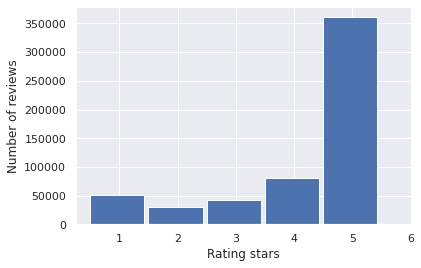

In [14]:
bins = [1, 2,3 ,4, 5, 6]
df.Score.hist(bins=bins, align='left', width=0.93)
xticks(bins)
xlabel('Rating stars')
ylabel('Number of reviews')
plt.show()

In [15]:
df.shape

(565082, 10)

In [0]:
#Assign average rating as the predicted rating.
df['predicted_rating'] = round(sum(df.Score)/len(df.index))

In [30]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,predicted_rating
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,4.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,4.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,4.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,4.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,4.0


In [0]:
t = df[['Score', 'predicted_rating']].dropna(how='any')

In [32]:
t

,Score,predicted_rating
0,5,4.0
1,1,4.0
2,4,4.0
3,2,4.0
4,5,4.0
...,...,...
568449,5,4.0
568450,2,4.0
568451,5,4.0
568452,5,4.0


In [38]:
precision = metrics.precision_score(t.Score, t.predicted_rating,average='weighted')
recall = metrics.recall_score(t.Score, t.predicted_rating,average='weighted')
f1 = metrics.f1_score(t.Score, t.predicted_rating,average='weighted')
accuracy = accuracy_score(t.Score, t.predicted_rating)

baselineResult = {}

data = {'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'accuracy':accuracy}

baselineResult['Baseline'] = data
pd.DataFrame(baselineResult).T

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,f1_score,precision,recall
Baseline,0.1421,0.03536,0.020192,0.1421


In [14]:
#Avanced model
!pip install nlppreprocess

In [0]:
from nlppreprocess import NLP
obj = NLP(replace_words=True, remove_stopwords=True, remove_punctuations=True, lemmatize=True, lemmatize_method='wordnet' )

In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
df['Text'] = df['Text'].apply(obj.process)

In [18]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several Vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled Jumbo Salted Peanuts t...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection been around few century light pillo...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,you are looking secret ingredient in Robitussi...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy great price There wide assortment ...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great sesame chicken this good not better than...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I m disappointed with flavor chocolate note ar...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,These star are small you can give those in one...
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are BEST treat training and rewarding yo...


In [0]:
# Advanced models

In [0]:
numTopics = 25

In [22]:
t = df.dropna(how='all')
t.shape

(565082, 10)

In [33]:
minReviewLen = 50
maxReviewLen = 400

print("Number of rows selected:",len(t[t.Text.str.len() > minReviewLen][t.Text.str.len() < maxReviewLen]))
df2 = t[t.Text.str.len() > minReviewLen][t.Text.str.len() < maxReviewLen]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Number of rows selected: 421543


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [32]:
print("Number of rows selected:",len(t[t.Text.str.len() > minReviewLen][t.Text.str.len() < maxReviewLen]))

Number of rows selected: 240899


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [0]:
df2.reset_index(inplace=True,drop=True)

In [35]:
df2

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several Vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled Jumbo Salted Peanuts t...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection been around few century light pillo...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,you are looking secret ingredient in Robitussi...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy great price There wide assortment ...
...,...,...,...,...,...,...,...,...,...,...
421538,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great sesame chicken this good not better than...
421539,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I m disappointed with flavor chocolate note ar...
421540,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,These star are small you can give those in one...
421541,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are BEST treat training and rewarding yo...


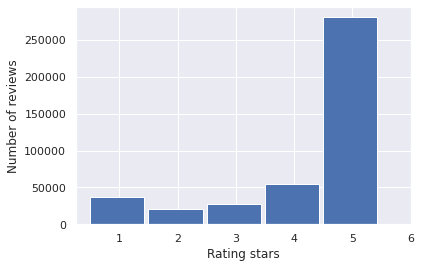

In [36]:
bins = [1, 2,3 ,4, 5, 6]
df2.Score.hist(bins=bins, align='left', width=0.93)
xticks(bins)
xlabel('Rating stars')
ylabel('Number of reviews')
plt.show()

In [66]:
nltk.download('stopwords')
stoplist = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
stoplist={}

In [69]:
stoplist

{}

In [0]:
def perform_lda(allReviewsTrain, numTopics):
    corpus = []
    for review in allReviewsTrain:
        # Remove punctuations
        review = re.sub(r'[^a-zA-Z]', ' ', review)
        # To lowercase
        review = review.lower()
        # Remove stop words
        texts = [word for word in review.lower().split() if word not in stoplist]
        try:
            corpus.append(texts)
        except:
            pass

    # Build dictionary
    dictionary = corpora.Dictionary(corpus)
    dictionary.save('restaurant_reviews.dict')
        
    # Build vectorized corpus
    corpus_2 = [dictionary.doc2bow(text) for text in corpus]
    #corpora.MmCorpus.serialize('LDA/restaurant_reviews.mm', corpus_2)
    
    lda = models.LdaModel(corpus_2, num_topics=numTopics, id2word=dictionary)
    return lda

In [113]:
stoplist

{}

In [0]:
# Process the reviews and generate a topic distribution matrix (to be used as features in classification)
import re
def process_reviews(dirty_data_set):
    clean_data_set = []
    for review in dirty_data_set:
        # Remove punctuations
        review = re.sub(r'[^a-zA-Z]', ' ', review)
        # To lowercase
        review = review.lower()
        # Remove stop words
        texts = [word for word in review.lower().split() if word not in stoplist]
        try:
            clean_data_set.append(' '.join(texts))
        except:
            pass
    return clean_data_set

# Generates a matrix of topic probabilities for each document in matrix
# Returns topic_dist for the input corpus, and all_dist, a running sum of all the corpuses
def generate_topic_dist_matrix(lda, numTopics, corpus, all_dist, star):
    topic_dist = [0] * numTopics
    dictionary = corpora.Dictionary.load("restaurant_reviews.dict")
    for doc in corpus:
        vec = dictionary.doc2bow(doc.lower().split())
        output = lda[vec]
        highest_prob = 0
        highest_topic = 0
        temp = [0] * numTopics    # List to keep track of topic distribution for each document
        for topic in output:
            this_topic, this_prob = topic
            temp[this_topic] = this_prob
            if this_prob > highest_prob:
                highest_prob = this_prob 
                highest_topic = this_topic
        temp.append(star)
        all_dist.append(temp)
        topic_dist[highest_topic] += 1
    return topic_dist, all_dist

In [0]:
#Construct 5 groups for each rating
starsGroup = df2.groupby('Score')

all_1stars_text = starsGroup.get_group(1.0)['Text']
all_2stars_text = starsGroup.get_group(2.0)['Text']
all_3stars_text = starsGroup.get_group(3.0)['Text']
all_4stars_text = starsGroup.get_group(4.0)['Text']
all_5stars_text = starsGroup.get_group(5.0)['Text']

all_1stars_labels = [1.0]*len(all_1stars_text)
all_2stars_labels = [2.0]*len(all_2stars_text)
all_3stars_labels = [3.0]*len(all_3stars_text)
all_4stars_labels = [4.0]*len(all_4stars_text)
all_5stars_labels = [5.0]*len(all_5stars_text)

In [115]:
all_5stars_text

0         bought several Vitality canned dog food produc...
4         Great taffy great price There wide assortment ...
6         saltwater taffy had great flavor and very soft...
7         taffy good very soft and chewy flavor are amaz...
8         Right now I m mostly just sprouting my cat can...
                                ...                        
421537    My only complaint there s much it not use huge...
421538    Great sesame chicken this good not better than...
421540    These star are small you can give those in one...
421541    These are BEST treat training and rewarding yo...
421542    am very satisfied product advertised use cerea...
Name: Text, Length: 280906, dtype: object

In [0]:
####Split into training and testing data randomly using sklearn's library

from sklearn.model_selection import train_test_split

all_1stars_text_train, all_1stars_text_test, all_1stars_labels_train, all_1stars_labels_test = train_test_split(all_1stars_text, all_1stars_labels, test_size=0.20)
all_2stars_text_train, all_2stars_text_test, all_2stars_labels_train, all_2stars_labels_test = train_test_split(all_2stars_text, all_2stars_labels, test_size=0.20)
all_3stars_text_train, all_3stars_text_test, all_3stars_labels_train, all_3stars_labels_test = train_test_split(all_3stars_text, all_3stars_labels, test_size=0.20)
all_4stars_text_train, all_4stars_text_test, all_4stars_labels_train, all_4stars_labels_test = train_test_split(all_4stars_text, all_4stars_labels, test_size=0.20)
all_5stars_text_train, all_5stars_text_test, all_5stars_labels_train, all_5stars_labels_test = train_test_split(all_5stars_text, all_5stars_labels, test_size=0.20)

In [117]:
all_4stars_text_train

363850    wouldn t call these almond sweet but they just...
385566    By flavor too strong and overwhelming after fe...
332509    bought try and make cola drink like Borders Bo...
204352    been week and like product After researching o...
53942     PRODUCT TASTES LIKE MILD NUTTY HONEY VERY DIFF...
                                ...                        
321962    product exactly what wanted Pumpkin not found ...
247103    my cat will eat it but arent crazy either cons...
318310    great assortment and price I only give star be...
416159    not eat red meat sea food get expensive and ch...
200141    These are really good My two little cousin cam...
Name: Text, Length: 43837, dtype: object

In [57]:
all_5stars_text_train

343257    Several day ago made decision quit smoking cou...
402057    sample pack will give home roaster good sense ...
407143    These are my husband s favorite chip love tang...
242760    Our Newf Owen Senior citizen now wanted switch...
273018    you like making homemade oreo like cooky black...
                                ...                        
330327    wanted spice after seeing Tyler Florence use i...
28943     My daughter limited diet due allergy love eati...
166820    not expect chopped into piece I m used using w...
4818      HAD USED AND COME LOVE PRODUCT AND SUDDENLY CO...
320618    wonderful item yourself and baby Clean up snap...
Name: Text, Length: 224724, dtype: object

In [118]:
# Process the reviews
corpus_5stars = process_reviews(all_5stars_text_train)
corpus_4stars = process_reviews(all_4stars_text_train)
corpus_3stars = process_reviews(all_3stars_text_train)
corpus_2stars = process_reviews(all_2stars_text_train)
corpus_1stars = process_reviews(all_1stars_text_train)

print("Number of 5-star reviews after processing: ", len(corpus_5stars))
print("Number of 4-star reviews after processing: ", len(corpus_4stars))
print("Number of 3-star reviews after processing: ", len(corpus_3stars))
print("Number of 2-star reviews after processing: ", len(corpus_2stars))
print("Number of 1-star reviews after processing: ", len(corpus_1stars))

Number of 5-star reviews after processing:  224724
Number of 4-star reviews after processing:  43837
Number of 3-star reviews after processing:  22361
Number of 2-star reviews after processing:  16353
Number of 1-star reviews after processing:  29956


In [121]:
corpus_5stars[1]

'stash blended delicious green tea with herb and flavoring just delicious needing no sweetening or very little'

In [59]:
all_5stars_text_train

343257    Several day ago made decision quit smoking cou...
402057    sample pack will give home roaster good sense ...
407143    These are my husband s favorite chip love tang...
242760    Our Newf Owen Senior citizen now wanted switch...
273018    you like making homemade oreo like cooky black...
                                ...                        
330327    wanted spice after seeing Tyler Florence use i...
28943     My daughter limited diet due allergy love eati...
166820    not expect chopped into piece I m used using w...
4818      HAD USED AND COME LOVE PRODUCT AND SUDDENLY CO...
320618    wonderful item yourself and baby Clean up snap...
Name: Text, Length: 224724, dtype: object

In [0]:
all_5_4_train = np.append(corpus_5stars, corpus_4stars)
all_5_4_3_train = np.append(all_5_4_train, corpus_3stars)
all_5_4_3_2_train = np.append(all_5_4_3_train, corpus_2stars)
all_text_train = np.append(all_5_4_3_2_train, corpus_1stars)

# pickle.dump(all_text_train, open("all_text_train.p", "wb"))

In [124]:
all_text_train[1]

'stash blended delicious green tea with herb and flavoring just delicious needing no sweetening or very little'

In [0]:
corpus_5stars

In [71]:
%time lda = perform_lda(all_text_train, numTopics)
# pickle.dump(lda, open("lda.p", "wb"))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CPU times: user 6min 27s, sys: 1.39 s, total: 6min 28s
Wall time: 6min 28s


In [0]:
pickle.dump(lda, open("lda.p", "wb"))

In [0]:
import pickle
Pkl_Filename = "lda.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lda, file)

# # Load the Model back from file
# with open(Pkl_Filename, 'rb') as file:  
#     Pickled_Model = pickle.load(file)

# Pickled_Model

In [77]:
# ### Build the final data frame containing topic distribution for each set of rating

topic_dist_list = []

# Keep a separate list to count topics
topic_dist_5stars = []
topic_dist_4stars = []
topic_dist_3stars = []
topic_dist_2stars = []
topic_dist_1stars = []

topic_dist_5stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_5stars, topic_dist_list, 5)
topic_dist_4stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_4stars, topic_dist_list, 4)
topic_dist_3stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_3stars, topic_dist_list, 3)
topic_dist_2stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_2stars, topic_dist_list, 2)
topic_dist_1stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_1stars, topic_dist_list, 1)

cols = []
for i in range(1, numTopics+1):
    cols.append("Topic"+ str(i))
cols.append("Star")

topic_dist_train_1_2_3_4_5_df = pd.DataFrame(topic_dist_list, columns=cols)

# pickle.dump(topic_dist_train_1_2_3_4_5_df, open("topic_dist_train_1_2_3_4_5_df.p", "wb"))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [79]:
#Get topic distribution of test data.

# Process the test reviews
corpus_5stars = process_reviews(all_5stars_text_test)
corpus_4stars = process_reviews(all_4stars_text_test)
corpus_3stars = process_reviews(all_3stars_text_test)
corpus_2stars = process_reviews(all_2stars_text_test)
corpus_1stars = process_reviews(all_1stars_text_test)

print("Number of 5-star reviews after processing: ", len(corpus_5stars))
print("Number of 4-star reviews after processing: ", len(corpus_4stars))
print("Number of 3-star reviews after processing: ", len(corpus_3stars))
print("Number of 2-star reviews after processing: ", len(corpus_2stars))
print("Number of 1-star reviews after processing: ", len(corpus_1stars))

Number of 5-star reviews after processing:  56182
Number of 4-star reviews after processing:  10960
Number of 3-star reviews after processing:  5591
Number of 2-star reviews after processing:  4089
Number of 1-star reviews after processing:  7490


In [0]:
all_5_4_test = np.append(corpus_5stars, corpus_4stars)
all_5_4_3_test = np.append(all_5_4_test, corpus_3stars)
all_5_4_3_2_test = np.append(all_5_4_3_test, corpus_2stars)
all_text_test = np.append(all_5_4_3_2_test, corpus_1stars)

# pickle.dump(all_text_test, open("all_text_test.p", "wb"))

In [81]:
topic_dist_list = []

# Keep a separate list to count topics
topic_dist_5stars = []
topic_dist_4stars = []
topic_dist_3stars = []
topic_dist_2stars = []
topic_dist_1stars = []


topic_dist_5stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_5stars, topic_dist_list, 5)
topic_dist_4stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_4stars, topic_dist_list, 4)
topic_dist_3stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_3stars, topic_dist_list, 3)
topic_dist_2stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_2stars, topic_dist_list, 2)
topic_dist_1stars, topic_dist_list = generate_topic_dist_matrix(lda, numTopics, corpus_1stars, topic_dist_list, 1)

cols = []
for i in range(1, numTopics+1):
    cols.append("Topic"+ str(i))
cols.append("Star")

topic_dist_test_1_2_3_4_5_df = pd.DataFrame(topic_dist_list, columns=cols)

# pickle.dump(topic_dist_test_1_2_3_4_5_df, open("topic_dist_test_1_2_3_4_5_df.p", "wb"))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [82]:
topic_dist_test_1_2_3_4_5_df.shape

(84312, 26)

In [83]:
topic_dist_train_1_2_3_4_5_df.shape

(337231, 26)

In [84]:
topic_dist_train_1_2_3_4_5_df

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,Topic25,Star
0,0.376765,0.041659,0,0,0.135724,0,0.011652,0.000000,0.074401,0.000000,0.000000,0.035298,0.000000,0,0.000000,0.132171,0.00000,0.000000,0.000000,0.103069,0.037894,0.000000,0,0.042728,0.000000,5
1,0.000000,0.064840,0,0,0.000000,0,0.133611,0.000000,0.350143,0.000000,0.000000,0.000000,0.177100,0,0.000000,0.017090,0.00000,0.000000,0.000000,0.150292,0.000000,0.000000,0,0.102587,0.000000,5
2,0.000000,0.000000,0,0,0.000000,0,0.000000,0.107641,0.000000,0.613329,0.000000,0.215404,0.000000,0,0.000000,0.054594,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,5
3,0.000000,0.000000,0,0,0.000000,0,0.243194,0.000000,0.000000,0.288203,0.000000,0.118985,0.165934,0,0.000000,0.032950,0.00000,0.012745,0.013060,0.028959,0.000000,0.000000,0,0.089633,0.000000,5
4,0.000000,0.027358,0,0,0.000000,0,0.028210,0.000000,0.000000,0.110065,0.000000,0.000000,0.164495,0,0.184944,0.000000,0.18542,0.000000,0.000000,0.000000,0.295486,0.000000,0,0.000000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337226,0.000000,0.000000,0,0,0.000000,0,0.000000,0.000000,0.061211,0.000000,0.000000,0.032708,0.000000,0,0.076061,0.264851,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.230471,0.321074,1
337227,0.200798,0.000000,0,0,0.000000,0,0.000000,0.278652,0.000000,0.000000,0.133894,0.000000,0.000000,0,0.229580,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.042562,0,0.000000,0.109611,1
337228,0.131018,0.000000,0,0,0.041838,0,0.000000,0.101021,0.000000,0.000000,0.000000,0.000000,0.084706,0,0.000000,0.444631,0.00000,0.013083,0.014951,0.047959,0.080322,0.019131,0,0.012468,0.000000,1
337229,0.000000,0.000000,0,0,0.000000,0,0.041936,0.060188,0.022644,0.000000,0.000000,0.018144,0.221950,0,0.076723,0.331115,0.03242,0.000000,0.000000,0.129653,0.017260,0.000000,0,0.000000,0.045995,1


In [0]:
#Add sentiment label which will be used to train sentiment classifier
def getSentiment(x):
    if x < 3.5:
        return 0
    else:
        return 1

In [0]:
topic_dist_train_1_2_3_4_5_df['Sentiment'] = topic_dist_train_1_2_3_4_5_df['Star'].map(getSentiment)
topic_dist_test_1_2_3_4_5_df['Sentiment'] = topic_dist_test_1_2_3_4_5_df['Star'].map(getSentiment)

In [0]:
# 3. LDA Model
# To reduce processing of redundant information that we did on term frequency method, we are using topic modeling to extract major topics in a review and using that as features.

In [88]:
features = list(topic_dist_train_1_2_3_4_5_df.columns[:numTopics])
print(features)

['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16', 'Topic17', 'Topic18', 'Topic19', 'Topic20', 'Topic21', 'Topic22', 'Topic23', 'Topic24', 'Topic25']


In [93]:
starsGroup

In [98]:
x_train = topic_dist_train_1_2_3_4_5_df[features]
y_train = topic_dist_train_1_2_3_4_5_df['Star']

x_test = topic_dist_test_1_2_3_4_5_df[features]
y_test = topic_dist_test_1_2_3_4_5_df['Star'] 

clfs = [KNeighborsClassifier(), MultinomialNB(), LogisticRegression(), LDA(), QDA(), RandomForestClassifier(n_estimators=100, n_jobs=2), AdaBoostClassifier(n_estimators=100)]
clf_names = ['Nearest Neighbors', 'Multinomial Naive Bayes', 'Logistic Regression', 'LDA', 'QDA', 'Random Forest', 'AdaBoost']

LDAResults = {}
for (i, clf_) in enumerate(clfs):
    clf = clf_.fit(x_train, y_train)
    preds = clf.predict(x_test)
    
    precision = metrics.precision_score(y_test, preds,average=None)
    recall = metrics.recall_score(y_test, preds,average=None)
    f1 = metrics.f1_score(y_test, preds,average=None)
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    matrix = metrics.confusion_matrix(y_test, preds, labels=np.array(list(starsGroup.groups.keys())))
    
    data = {'precision':precision,
            'recall':recall,
            'f1_score':f1,
            'accuracy':accuracy,
            'clf_report':report,
            'clf_matrix':matrix,
            'y_predicted':preds}
    
    LDAResults[clf_names[i]] = data

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:


In [97]:
np.array(list(starsGroup.groups.keys()))

array([1, 2, 3, 4, 5])

In [96]:
starsGroup.groups.keys()

dict_keys([1, 2, 3, 4, 5])

In [99]:
cols = ['precision', 'recall', 'f1_score', 'accuracy']
pd.DataFrame(LDAResults).T[cols].T

,Nearest Neighbors,Multinomial Naive Bayes,Logistic Regression,LDA,QDA,Random Forest,AdaBoost
precision,"[0.40271493212669685, 0.4228428213390619, 0.42...","[0.0, 0.0, 0.0, 0.0, 0.6663582882626435]","[0.24675324675324675, 0.0, 0.21621621621621623...","[0.31521739130434784, 0.0, 0.18596491228070175...","[0.08726287262872628, 0.04625658023006434, 0.0...","[0.9549893842887474, 0.9867549668874173, 0.968...","[0.3333333333333333, 0.0, 0.5, 0.0, 0.66643732..."
recall,"[0.33271028037383177, 0.2888236732697481, 0.31...","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0025367156208277704, 0.0, 0.002861742085494...","[0.0038718291054739653, 0.0, 0.009479520658200...","[0.02149532710280374, 0.23208608461726585, 0.0...","[0.30026702269692923, 0.29151381755930544, 0.3...","[0.00040053404539385846, 0.0, 0.00017885888034..."
f1_score,"[0.3643807574206755, 0.34321418192385933, 0.36...","[0.0, 0.0, 0.0, 0.0, 0.799777926459493]","[0.005021805206819083, 0.0, 0.0056487202118270...","[0.007649696649960433, 0.0, 0.0180394826412525...","[0.034493840385645416, 0.07713879292826663, 0....","[0.4568816658202133, 0.45006607513686997, 0.47...","[0.0008001066808907853, 0.0, 0.000357589844448..."
accuracy,0.678029,0.666358,0.666157,0.665575,0.244425,0.766095,0.666382


In [101]:
for model, val in LDAResults.items():
    print('-------'+'-'*len(model))
    print('MODEL:', model)
    print('-------'+'-'*len(model))
    print('The precision for this classifier is ' + str(val['precision']))
    print('The recall for this classifier is    ' + str(val['recall']))
    print('The f1 for this classifier is        ' + str(val['f1_score']))
    print('The accuracy for this classifier is  ' + str(val['accuracy']))
    print('Here is the classification report:')
    print(val['clf_report'])

------------------------
MODEL: Nearest Neighbors
------------------------
The precision for this classifier is [0.40271493 0.42284282 0.42910171 0.45731633 0.76112917]
The recall for this classifier is    [0.33271028 0.28882367 0.3101413  0.34361314 0.85424157]
The f1 for this classifier is        [0.36438076 0.34321418 0.36004983 0.39239385 0.8050018 ]
The accuracy for this classifier is  0.6780292247841351
Here is the classification report:
              precision    recall  f1-score   support

           1       0.40      0.33      0.36      7490
           2       0.42      0.29      0.34      4089
           3       0.43      0.31      0.36      5591
           4       0.46      0.34      0.39     10960
           5       0.76      0.85      0.81     56182

    accuracy                           0.68     84312
   macro avg       0.49      0.43      0.45     84312
weighted avg       0.65      0.68      0.66     84312

------------------------------
MODEL: Multinomial Naive Bayes
-

In [0]:
# This is not giving expected accuracy because some topics, though they seem similar have different sentiments. So adding a sentimnt layer.

In [108]:
all_text_train[1][0]

's'

In [125]:
#Adding Sentiment Column using Logistic Regression
vectorizer = TfidfVectorizer()
sentimentXtrain = vectorizer.fit_transform(all_text_train)
sentimentXtest = vectorizer.transform(all_text_test)

sentimentYtrain = topic_dist_train_1_2_3_4_5_df['Sentiment']
sentimentYtest = topic_dist_test_1_2_3_4_5_df['Sentiment']

nb_classifier = LogisticRegression().fit(sentimentXtrain, sentimentYtrain)

ySentimentTrain = nb_classifier.predict(sentimentXtrain)
ySentimentTest = nb_classifier.predict(sentimentXtest)

topic_dist_train_1_2_3_4_5_df['Sentiment_Predicted'] = ySentimentTrain
topic_dist_test_1_2_3_4_5_df['Sentiment_Predicted'] = ySentimentTest

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [126]:
clfs = [KNeighborsClassifier(), MultinomialNB(), LogisticRegression()]
clf_names = ['Nearest Neighbors', 'Multinomial Naive Bayes', 'Logistic Regression']

SentimentResults = {}
for (i, clf_) in enumerate(clfs):
    clf = clf_.fit(sentimentXtrain, sentimentYtrain)
    preds = clf.predict(sentimentXtest)
    
    precision = metrics.precision_score(sentimentYtest, preds,average=None)
    recall = metrics.recall_score(sentimentYtest, preds,average=None)
    f1 = metrics.f1_score(sentimentYtest, preds,average=None)
    accuracy = accuracy_score(sentimentYtest, preds)
    report = classification_report(sentimentYtest, preds)
    matrix = metrics.confusion_matrix(sentimentYtest, preds, labels=np.array(list(starsGroup.groups.keys())))
    
    data = {'precision':precision,
            'recall':recall,
            'f1_score':f1,
            'accuracy':accuracy,
            'clf_report':report,
            'clf_matrix':matrix,
            'y_predicted':preds}
    
    SentimentResults[clf_names[i]] = data
    
cols = ['precision', 'recall', 'f1_score', 'accuracy']
pd.DataFrame(SentimentResults).T[cols].T

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetr

,Nearest Neighbors,Multinomial Naive Bayes,Logistic Regression
precision,"[0.0, 0.7963516462662492]","[0.0, 0.7963516462662492]","[0.0, 0.7963516462662492]"
recall,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
f1_score,"[0.0, 0.8866322447739908]","[0.0, 0.8866322447739908]","[0.0, 0.8866322447739908]"
accuracy,0.796352,0.796352,0.796352


In [128]:
for model, val in SentimentResults.items():
    print('-------'+'-'*len(model))
    print('MODEL:', model)
    print('-------'+'-'*len(model))
    print('The precision for this classifier is ' + str(val['precision']))
    print('The recall for this classifier is    ' + str(val['recall']))
    print('The f1 for this classifier is        ' + str(val['f1_score']))
    print('The accuracy for this classifier is  ' + str(val['accuracy']))
    print('Here is the classification report:')
    print(val['clf_report'])

------------------------
MODEL: Nearest Neighbors
------------------------
The precision for this classifier is [0.         0.79635165]
The recall for this classifier is    [0. 1.]
The f1 for this classifier is        [0.         0.88663224]
The accuracy for this classifier is  0.7963516462662492
Here is the classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17170
           1       0.80      1.00      0.89     67142

    accuracy                           0.80     84312
   macro avg       0.40      0.50      0.44     84312
weighted avg       0.63      0.80      0.71     84312

------------------------------
MODEL: Multinomial Naive Bayes
------------------------------
The precision for this classifier is [0.         0.79635165]
The recall for this classifier is    [0. 1.]
The f1 for this classifier is        [0.         0.88663224]
The accuracy for this classifier is  0.7963516462662492
Here is the classificati

In [0]:
#LDA with sentiment

In [131]:
features = list(topic_dist_train_1_2_3_4_5_df.columns[:numTopics])
features.append(topic_dist_train_1_2_3_4_5_df.columns[numTopics+2])
print(features)

['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16', 'Topic17', 'Topic18', 'Topic19', 'Topic20', 'Topic21', 'Topic22', 'Topic23', 'Topic24', 'Topic25', 'Sentiment_Predicted']


In [132]:
x_train = topic_dist_train_1_2_3_4_5_df[features]
y_train = topic_dist_train_1_2_3_4_5_df['Star']

x_test = topic_dist_test_1_2_3_4_5_df[features]
y_test = topic_dist_test_1_2_3_4_5_df['Star'] 

clfs = [KNeighborsClassifier(), MultinomialNB(), LogisticRegression(), LDA(), QDA(), RandomForestClassifier(n_estimators=100, n_jobs=2), AdaBoostClassifier(n_estimators=100)]
clf_names = ['Nearest Neighbors', 'Multinomial Naive Bayes', 'Logistic Regression', 'LDA', 'QDA', 'Random Forest', 'AdaBoost']

FinalResults = {}
for (i, clf_) in enumerate(clfs):
    clf = clf_.fit(x_train, y_train)
    preds = clf.predict(x_test)
    
    precision = metrics.precision_score(y_test, preds,average=None)
    recall = metrics.recall_score(y_test, preds,average=None)
    f1 = metrics.f1_score(y_test, preds,average=None)
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    matrix = metrics.confusion_matrix(y_test, preds, labels=np.array(list(starsGroup.groups.keys())))
    
    data = {'precision':precision,
            'recall':recall,
            'f1_score':f1,
            'accuracy':accuracy,
            'clf_report':report,
            'clf_matrix':matrix,
            'y_predicted':preds}
    
    FinalResults[clf_names[i]] = data

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:


In [133]:
cols = ['precision', 'recall', 'f1_score', 'accuracy']
pd.DataFrame(FinalResults).T[cols].T

,Nearest Neighbors,Multinomial Naive Bayes,Logistic Regression,LDA,QDA,Random Forest,AdaBoost
precision,"[0.5501618122977346, 0.5211267605633803, 0.472...","[0.0, 0.0, 0.0, 0.0, 0.6663582882626435]","[0.0, 0.0, 0.0, 0.0, 0.6663701384193859]","[0.0, 0.0, 0.0, 0.0, 0.666366191837364]","[0.12635692574902302, 0.03966942148760331, 0.0...","[0.998, 0.9929078014184397, 0.9908069458631257...","[1.0, 0.0, 0.5, 0.0, 0.666437316124134]"
recall,"[0.04539385847797063, 0.07238933724627049, 0.1...","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.9999822007048521]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.03885180240320427, 0.00586940572267058, 0.1...","[0.06662216288384512, 0.10271460014673514, 0.1...","[0.0012016021361815755, 0.0, 0.000178858880343..."
f1_score,"[0.08386778490379873, 0.12712046381790854, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.799777926459493]","[0.0, 0.0, 0.0, 0.0, 0.7997807688748746]","[0.0, 0.0, 0.0, 0.0, 0.799783619112696]","[0.059430205248647, 0.010225820195994889, 0.09...","[0.12490613266583228, 0.18617021276595747, 0.2...","[0.0024003200426723566, 0.0, 0.000357589844448..."
accuracy,0.680283,0.666358,0.666346,0.666358,0.321034,0.723966,0.666429


In [135]:
for model, val in FinalResults.items():
    print('-------'+'-'*len(model))
    print('MODEL:', model)
    print('-------'+'-'*len(model))
    print('The precision for this classifier is ' + str(val['precision']))
    print('The recall for this classifier is    ' + str(val['recall']))
    print('The f1 for this classifier is        ' + str(val['f1_score']))
    print('The accuracy for this classifier is  ' + str(val['accuracy']))
    print('Here is the classification report:')
    print(val['clf_report'])

------------------------
MODEL: Nearest Neighbors
------------------------
The precision for this classifier is [0.55016181 0.52112676 0.47280122 0.44114271 0.71375378]
The recall for this classifier is    [0.04539386 0.07238934 0.16633876 0.31560219 0.93145491]
The f1 for this classifier is        [0.08386778 0.12712046 0.24609685 0.36795915 0.80820077]
The accuracy for this classifier is  0.6802827592750735
Here is the classification report:
              precision    recall  f1-score   support

           1       0.55      0.05      0.08      7490
           2       0.52      0.07      0.13      4089
           3       0.47      0.17      0.25      5591
           4       0.44      0.32      0.37     10960
           5       0.71      0.93      0.81     56182

    accuracy                           0.68     84312
   macro avg       0.54      0.31      0.33     84312
weighted avg       0.64      0.68      0.62     84312

------------------------------
MODEL: Multinomial Naive Bayes
-

In [0]:
#Another aproach

In [0]:
df=pd.read_csv('Reviews.csv')

In [6]:
import time
import datetime

import pickle
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import pylab
import re
import scipy as sp
import seaborn

from gensim import corpora, models
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.lda import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
# from sklearn.qda import QDA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

plt.rc('figure', figsize=(10,6))
seaborn.set()
colors = seaborn.color_palette()
%pylab inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
df.isnull().sum()
df.dropna(inplace=True)
print(df.shape)
print('\n')

df.drop_duplicates(subset=['ProductId','UserId','Score','Time'],inplace=True)
print(df.shape)


(568411, 10)


(565082, 10)


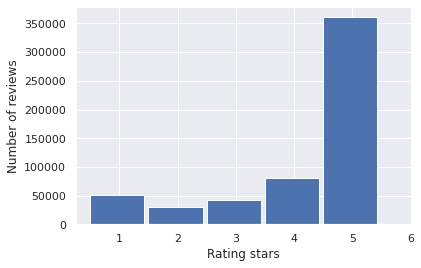

In [8]:
bins = [1, 2,3 ,4, 5, 6]
df.Score.hist(bins=bins, align='left', width=0.93)
xticks(bins)
xlabel('Rating stars')
ylabel('Number of reviews')
plt.show()

In [9]:
#Avanced model
!pip install nlppreprocess
import nltk
nltk.download('wordnet')
from nlppreprocess import NLP
obj = NLP(replace_words=True, remove_stopwords=True, remove_punctuations=True, lemmatize=True, lemmatize_method='wordnet' )

df['Text'] = df['Text'].apply(obj.process)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
df.to_csv('Reviews_after_nlppreprocess.csv',index=False)

In [0]:
df=pd.read_csv('Reviews_after_nlppreprocess.csv')

In [10]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['Text'], df['Score'], random_state = 0, test_size=0.3, shuffle=True)

In [11]:
df['Text']

0         bought several Vitality canned dog food produc...
1         Product arrived labeled Jumbo Salted Peanuts t...
2         confection been around few century light pillo...
3         you are looking secret ingredient in Robitussi...
4         Great taffy great price There wide assortment ...
                                ...                        
568449    Great sesame chicken this good not better than...
568450    I m disappointed with flavor chocolate note ar...
568451    These star are small you can give those in one...
568452    These are BEST treat training and rewarding yo...
568453    am very satisfied product advertised use cerea...
Name: Text, Length: 565082, dtype: object

In [0]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

review_lines = list()
lines = df['Text'].values.tolist()

In [13]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
review_lines

[]

In [0]:
stop_words = {}

In [0]:
# df.isnull().sum()
# df.dropna(inplace=True)

In [0]:
# df.isnull().sum()

In [17]:
import nltk
nltk.download('punkt')

for line in lines:
  tokens = word_tokenize(line)
  #convert to lower case
  tokens = [w.lower() for w in tokens]
  #remove punctuation from each word
  table = str.maketrans('','',string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  #remove remaining tokens that are not alphabetic
  words = [word for word in stripped if word.isalpha()]
  words = [w for w in words if not w in stop_words]
  review_lines.append(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
len(review_lines)

565082

In [0]:
# Gensim's word2vec API requires some parameters for initialization

In [0]:
import gensim

EMBEDDING_DIM=100

# #train word2vec model
model = gensim.models.Word2Vec(sentences=review_lines, size=EMBEDDING_DIM,window=5,workers=4,min_count=1)
#vocab size
words = list(model.wv.vocab)
print('Vocabulary size %d' % len(words))

In [38]:
# The most similar words for word horrible are:
model.wv.most_similar('horrible')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('terrible', 0.9341647028923035),
 ('awful', 0.9024513363838196),
 ('horrid', 0.8217014074325562),
 ('nasty', 0.801866888999939),
 ('disgusting', 0.7888876795768738),
 ('foul', 0.7702139019966125),
 ('horrendous', 0.7360975742340088),
 ('aweful', 0.7318627834320068),
 ('gross', 0.7207281589508057),
 ('repulsive', 0.7196914553642273)]

In [0]:
# The next step is to use the word embeddings directly in the embedding layer in our classification model. we can save the model to be used later.


In [39]:
# save model
filename = 'Amazon_reviews_embedding_word2vec.txt'
model.wv.save_word2vec_format(filename,binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# Use Pre-trained Embedding

In [20]:
#The next step is to load the word embedding as a directory of words to vectors.

import os

embeddings_index = {}
f = open(os.path.join('','Amazon_reviews_embedding_word2vec.txt'), encoding = "utf-8")
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:])
  embeddings_index[word] = coefs
f.close

<function TextIOWrapper.close>

In [0]:
#The next step is to convert the word embedding into tokenized vector. Recall that the review documents are integer encoded prior to passing them to the Embedding layer. The integer maps to the index of a specific vector in the embedding layer. Therefore, it is important that we lay the vectors out in the Embedding layer such that the encoded words map to the correct vector.

In [21]:
total_reviews = df['Text']
total_reviews

0         bought several Vitality canned dog food produc...
1         Product arrived labeled Jumbo Salted Peanuts t...
2         confection been around few century light pillo...
3         you are looking secret ingredient in Robitussi...
4         Great taffy great price There wide assortment ...
                                ...                        
568449    Great sesame chicken this good not better than...
568450    I m disappointed with flavor chocolate note ar...
568451    These star are small you can give those in one...
568452    These are BEST treat training and rewarding yo...
568453    am very satisfied product advertised use cerea...
Name: Text, Length: 565082, dtype: object

In [0]:
max_length = max([len(s.split()) for s in total_reviews])

In [23]:
max_length

2626

In [24]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

# vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(review_lines)
sequences = tokenizer_obj.texts_to_sequences(review_lines)

# pad sequences
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))



review_pad = pad_sequences(sequences, maxlen=max_length)
Score = df['Score'].values
print('Shape of review tensor:', review_pad.shape)
print('Shape of score tensor:', Score.shape)

Found 120846 unique tokens.
Shape of review tensor: (565082, 2626)
Shape of score tensor: (565082,)


In [0]:
#Now we will map embeddings from the loaded word2vec model for each word to the tokenizer_obj.word_index vocabulary and create a matrix with of word vectors.

In [0]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word,i in word_index.items():
  if i > num_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    #words not found in embedding index will be all-zeros.
    embedding_matrix[i] = embedding_vector

In [26]:
print(num_words)

120847


In [0]:
#We are now ready with the trained embedding vector to be used directly in the embedding layer. In the below code, the only change from previous model is using the embedding_matrix as input to the Embedding layer and setting trainable = False, since the embedding is already learned.

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import  Constant

# define model
model = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model.add(embedding_layer)
model.add(GRU(units=32,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(5,activation='softmax'))

#
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.


In [0]:
# Split data into a training set and a validation set
VALIDATION_SPLIT = 0.2

indices = np.arange(review_pad.shape[0])
np.random.shuffle(indices)
review_pad = review_pad[indices]
Score = Score[indices]
num_validation_samples = int(VALIDATION_SPLIT * review_pad.shape[0])

X_train_pad = review_pad[:-num_validation_samples]
y_train = Score[:-num_validation_samples]
X_test_pad = review_pad[-num_validation_samples:]
y_test = Score[-num_validation_samples:]

In [0]:
print('Shape of X_train_pad tensor:', X_train_pad.shape)
print('Shape of y_train tensor':, y_train.shape)
print('\n')
print('Shape of X_test_pad tensor', X_test_pad.shape)
print('Shape of y_test tensor:', y_test.shape)

In [0]:
Print('Training....')

model.fit(X_train_pad, y_train, batch_size=120, epochs=10, validation_data=(X_test_pad,y_test), verbose=2)